In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
datas = pd.read_csv('Iris.csv')
datas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
data = datas.drop(columns=['Id'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [38]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<Axes: >

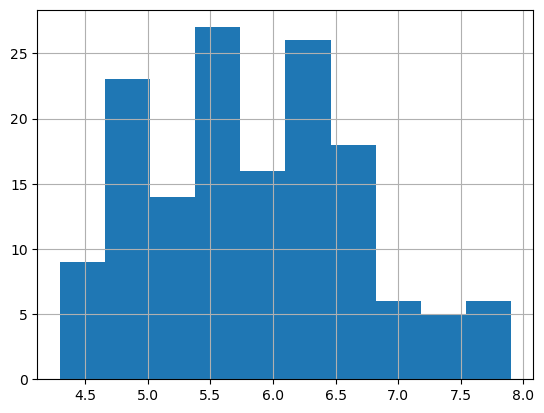

In [39]:
data.SepalLengthCm.hist()

<Axes: >

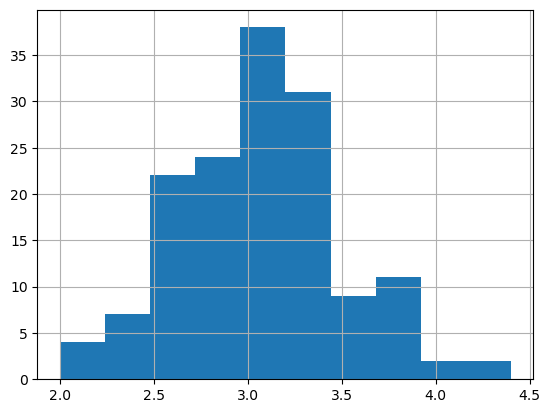

In [40]:
data.SepalWidthCm.hist()

<Axes: >

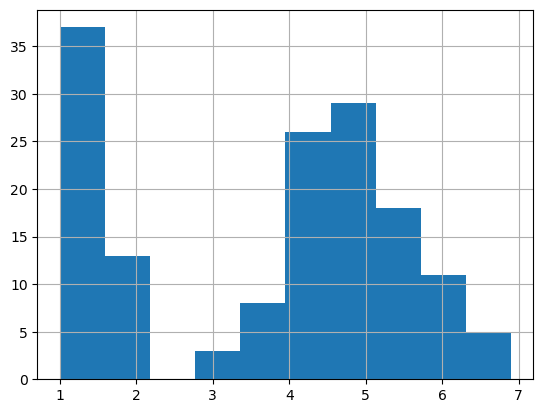

In [41]:
data.PetalLengthCm.hist()

<Axes: >

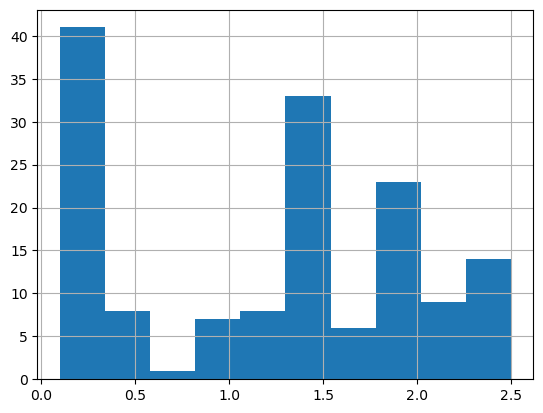

In [42]:
data.PetalWidthCm.hist()

In [43]:
# Scatterplot

colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

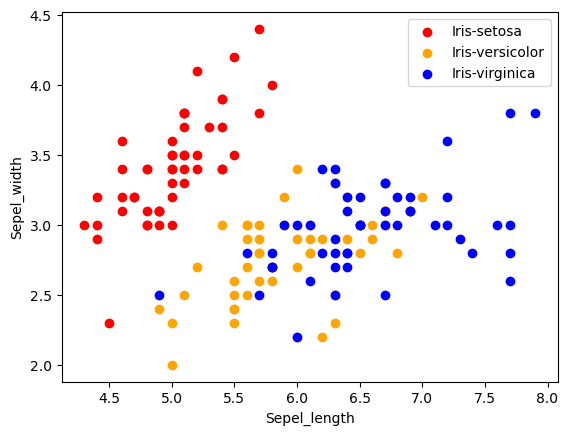

In [44]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepel_length')
plt.ylabel('Sepel_width')
plt.legend()

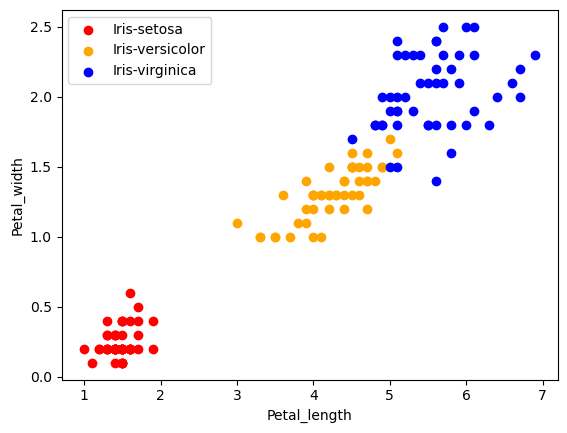

In [45]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.legend()

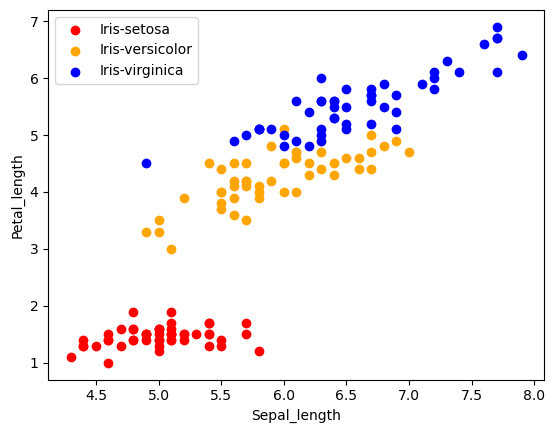

In [46]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal_length')
plt.ylabel('Petal_length')
plt.legend()

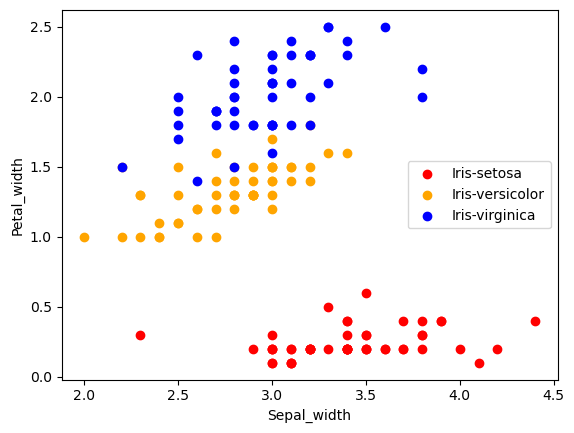

In [47]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal_width')
plt.ylabel('Petal_width')
plt.legend()

## Correlation Martix

In [48]:
data.corr(numeric_only=True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

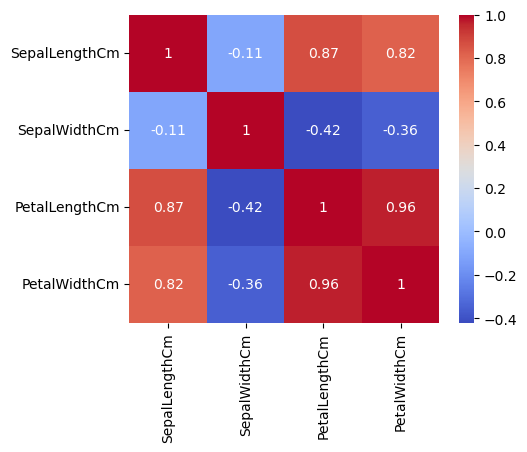

In [49]:
corr = data.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

## Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
data.Species = le.fit_transform(data.Species)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Model Training

In [93]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30

X = data.drop(columns=['Species'])
Y = data.Species
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [94]:
# logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [95]:
model.fit(x_train,y_train)

C:\Users\kpaps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
print('Accuracy : ',model.score(x_test,y_test) *100)

Accuracy :  100.0


In [97]:
# knn

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [98]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
print('Accuracy : ',model.score(x_test,y_test) *100)

Accuracy :  97.77777777777777


In [100]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [101]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
print('Accuracy : ',model.score(x_test,y_test) *100)

Accuracy :  97.77777777777777
